# **Import Library**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
%matplotlib inline

# **Data Loading**

Untuk melakukan data assesing, saya mendownload data dari kaggle dengan menggunakan *curl*

In [2]:
#!/bin/bash
!curl -L -o /content/archive.zip\
https://www.kaggle.com/api/v1/datasets/download/jakewright/house-price-data

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 20.0M  100 20.0M    0     0  25.6M      0 --:--:-- --:--:-- --:--:-- 25.6M


Pengertian:
Perintah diatas menyatakan bahwa, kita akan mendownload file dari kaggle sesuai url. Dengan menggunakan opsi -L dan -o. Yang mana -L adalah (Redirect) dimana jika server mengarahkan ke tempat lain untuk mendownload curl mengikuti tempat akhir file itu berada. Sedangkan opsi -o yaitu untuk merubah nama file yang kita download.

In [3]:
!unzip archive.zip

Archive:  archive.zip
  inflating: kaggle_london_house_price_data.csv  
  inflating: kaggle_london_house_price_data.parquet  


Pada tahapan ini saya membongkar isi file zip menggunakan perintah !unzip pada colab.

## **Memeriksa Tipe Variable Beserta Jumlahnya**

In [4]:
path = "/content/kaggle_london_house_price_data.csv"
dataframe = pd.read_csv(path)
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282872 entries, 0 to 282871
Data columns (total 28 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   fullAddress                                282872 non-null  object 
 1   postcode                                   282872 non-null  object 
 2   country                                    282872 non-null  object 
 3   outcode                                    282872 non-null  object 
 4   latitude                                   282872 non-null  float64
 5   longitude                                  282872 non-null  float64
 6   bathrooms                                  231769 non-null  float64
 7   bedrooms                                   256654 non-null  float64
 8   floorAreaSqM                               267060 non-null  float64
 9   livingRooms                                243737 non-null  float64
 10  tenure  

Pada tahapan ini saya membaca data menggunakan library **pandas** dengan fungsi *read_csv*.
Adapun output yang dihasilkan yaitu terdapat 28 kolom yang dibagi menjadi beberapa tipe data pada setiap kolom, diantaranya float(16), int(1), dan object(11). Dengan demikian jumlah keseluruhan data entri tersebut berjumlah 282872.

## **Deskripsi Variable**

| NO | Variable | Deskripsi |
|----|----------|-----------|
| 1 | fullAddres | Alamat lengkap properti |
| 2 | postcode | Kode pos mengidentifikasi area tertentu di London |
| 3 | country | Negara |
| 4 | outcode | Bagian pertama dari kode pos, mengelompokkan properti ke dalam zona geografis yang lebih luas |
| 5 | latitude | Koordinat geografis untuk pemetaan atau analisis berbasis lokasi|
| 6 |  longitude | Koordinat geografis untuk pemetaan atau analisis berbasis lokasi|
| 7 | bathrooms | Jumlah kamar mandi |
| 8 | bedrooms | Jumlah tempat tidur |
| 9 | floorAreaSqM | Luas lantai dalam meterpersegi |
| 10 | livingRooms | Ruang tamu |
| 11 | tenure | Status properti |
| 12 | propertyType | Jenis properti |
| 13 | currentEnergyRating | Peringkat energi saat ini |
| 14 | rentEstimate_lowerPrice | Estimasi harga sewa terendah |
| 15 | rentEstimate_currentPrice | Estimasi harga sewa saat ini |
| 16 | rentEstimate_upperPrice | Estimasi harga sewa tertinggi |
| 17 | saleEstimate_lowerPrice | Estimasi harga jual terendah |
| 18 | saleEstimate_currentPrice | Estimasi harga jual saat ini |
| 19 | saleEstimate_upperPrice | Estimasi harga jual tertinggi |
| 20 | saleEstimate_confidenceLevel | Keyakinan terhadap harga jual (LOW, MEDIUM, HIGH) |
| 21 | saleEstimate_ingestedAt | Estimasi stempel waktu penjulan |
| 22 | saleEstimate_valueChange.numericChange | Perubahan nilai absolut dalam estimasi harga jual properti |
| 23 | saleEstimate_valueChange.percentageChange | Persentase perubahan nilai absolut dalam estimasi harga jual properti |
| 24 | saleEstimate_valueChange.saleDate | Estimasi perubahan tanggal nilai jual |
| 25 | history_date | Histori tanggal |
| 26 | history_price | Histori harga |
| 27 | history_percentageChange | Histori persentase perubahan harga jual |
| 28 | history_numericChange | Histori perubahan angka |

# **Exploratory Data Analysis**

### **Menampilkan Deskripsi Statistik**

In [5]:
dataframe.describe()

,latitude,longitude,bathrooms,bedrooms,floorAreaSqM,livingRooms,rentEstimate_lowerPrice,rentEstimate_currentPrice,rentEstimate_upperPrice,saleEstimate_lowerPrice,saleEstimate_currentPrice,saleEstimate_upperPrice,saleEstimate_valueChange.numericChange,saleEstimate_valueChange.percentageChange,history_price,history_percentageChange,history_numericChange
count,282872.000000,282872.000000,231769.000000,256654.000000,267060.000000,243737.000000,281650.000000,281650.000000,281650.000000,2.823230e+05,2.823230e+05,2.823230e+05,2.823230e+05,282323.000000,2.828720e+05,160659.000000,1.606590e+05
mean,51.510089,-0.105075,1.440590,2.497732,99.537288,1.292996,3252.032842,3589.369253,3926.886206,8.245569e+05,8.953505e+05,9.661403e+05,3.121798e+04,27.974415,6.269685e+05,106.777153,2.549928e+05
std,0.056842,0.088464,0.722063,1.172747,56.350627,0.583383,3127.471821,3443.886735,3761.671442,8.034967e+05,9.116027e+05,1.025691e+06,1.033843e+06,313.907458,1.263486e+06,317.658191,7.821343e+05
min,51.385708,-0.347055,1.000000,1.000000,10.000000,1.000000,300.000000,350.000000,400.000000,8.100000e+04,8.900000e+04,9.300000e+04,-9.914200e+07,-99.763196,1.000000e+04,-99.890110,-7.390000e+07
25%,51.466582,-0.161159,1.000000,2.000000,63.000000,1.000000,1750.000000,1950.000000,2100.000000,4.160000e+05,4.460000e+05,4.750000e+05,1.200000e+04,2.254784,2.250000e+05,19.182630,5.000000e+04
50%,51.507067,-0.108848,1.000000,2.000000,85.000000,1.000000,2350.000000,2600.000000,2850.000000,5.810000e+05,6.220000e+05,6.640000e+05,3.700000e+04,6.585366,3.970000e+05,54.615385,1.330000e+05
75%,51.550993,-0.048715,2.000000,3.000000,117.000000,1.000000,3500.000000,3900.000000,4300.000000,9.080000e+05,9.780000e+05,1.046000e+06,9.200000e+04,14.461538,6.600000e+05,116.216216,2.900000e+05
max,51.665823,0.139249,9.000000,9.000000,500.000000,9.000000,100850.000000,109500.000000,118150.000000,2.082500e+07,2.603100e+07,3.123700e+07,2.268100e+07,37780.000000,1.000000e+08,45455.555556,6.382000e+07


Pada tahap ini bisa kita lihat rata-rata histroy_price berada pada 626.968,5, sedangkan rata-rata currentPrice lebih rendah, yaitu 3589,36.

## **Missing Value**

**Memeriksa nilai Kosong dan NaN**

In [6]:
dataframe.isna().sum()

,0
fullAddress,0
postcode,0
country,0
outcode,0
latitude,0
longitude,0
bathrooms,51103
bedrooms,26218
floorAreaSqM,15812
livingRooms,39135


Pada output yang ditampilkan banyak sekali nilai kosong atau NaN. terutama pada data history_percentageChange dan history_numericChange.

**Memeriksa nilai duplikat**

In [7]:
dataframe.duplicated().sum()

19

Terdapat 19 data duplikat pada dataframe

## **Menampilkan data Duplikat**

In [8]:
dataframe[dataframe.duplicated()]

,fullAddress,postcode,country,outcode,latitude,longitude,bathrooms,bedrooms,floorAreaSqM,livingRooms,...,saleEstimate_upperPrice,saleEstimate_confidenceLevel,saleEstimate_ingestedAt,saleEstimate_valueChange.numericChange,saleEstimate_valueChange.percentageChange,saleEstimate_valueChange.saleDate,history_date,history_price,history_percentageChange,history_numericChange
14224,"74 Western Beach Apartments, 36 Hanover Avenue...",E16 1DZ,England,E16,51.505526,0.017750,2.0,2.0,103.0,1.0,...,614000.0,MEDIUM,2024-10-07T13:26:59.894Z,112000.0,25.112108,2023-12-06,2002-07-12,270000,0.000000,0.0
18809,"6, 14–16 Church Hill, London, E17 3AG",E17 3AG,England,E17,51.585114,-0.017686,1.0,1.0,NaN,1.0,...,389000.0,LOW,2024-10-07T13:26:59.894Z,-251000.0,-43.652174,2023-12-14,2016-12-07,215000,0.000000,0.0
18810,"6, 14–16 Church Hill, London, E17 3AG",E17 3AG,England,E17,51.585114,-0.017686,1.0,1.0,NaN,1.0,...,389000.0,LOW,2024-10-07T13:26:59.894Z,-251000.0,-43.652174,2023-12-14,2016-12-07,215000,0.000000,0.0
18811,"6, 14–16 Church Hill, London, E17 3AG",E17 3AG,England,E17,51.585114,-0.017686,1.0,1.0,NaN,1.0,...,389000.0,LOW,2024-10-07T13:26:59.894Z,-251000.0,-43.652174,2023-12-14,2016-12-07,215000,0.000000,0.0
18812,"6, 14–16 Church Hill, London, E17 3AG",E17 3AG,England,E17,51.585114,-0.017686,1.0,1.0,NaN,1.0,...,389000.0,LOW,2024-10-07T13:26:59.894Z,-251000.0,-43.652174,2023-12-14,2016-12-07,215000,0.000000,0.0
18813,"6, 14–16 Church Hill, London, E17 3AG",E17 3AG,England,E17,51.585114,-0.017686,1.0,1.0,NaN,1.0,...,389000.0,LOW,2024-10-07T13:26:59.894Z,-251000.0,-43.652174,2023-12-14,2016-12-07,215000,0.000000,0.0
18817,"6, 14–16 Church Hill, London, E17 3AG",E17 3AG,England,E17,51.585114,-0.017686,1.0,1.0,NaN,1.0,...,389000.0,LOW,2024-10-07T13:26:59.894Z,-251000.0,-43.652174,2023-12-14,2016-09-23,215000,0.000000,0.0
18821,"6, 14–16 Church Hill, London, E17 3AG",E17 3AG,England,E17,51.585114,-0.017686,1.0,1.0,NaN,1.0,...,389000.0,LOW,2024-10-07T13:26:59.894Z,-251000.0,-43.652174,2023-12-14,2016-09-13,215000,0.000000,0.0
18822,"6, 14–16 Church Hill, London, E17 3AG",E17 3AG,England,E17,51.585114,-0.017686,1.0,1.0,NaN,1.0,...,389000.0,LOW,2024-10-07T13:26:59.894Z,-251000.0,-43.652174,2023-12-14,2016-09-13,215000,0.000000,0.0
52608,"45 Midhurst Avenue, London, N10 3EP",N10 3EP,England,N10,51.589230,-0.153108,3.0,2.0,68.0,1.0,...,586000.0,MEDIUM,2024-10-07T13:26:59.894Z,-1767000.0,-76.826087,2022-09-16,2021-08-09,553000,-5.792164,-34000.0


Pada tampilan output tersebut ternyata data duplikat menyatu dengan data null.

In [9]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282872 entries, 0 to 282871
Data columns (total 28 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   fullAddress                                282872 non-null  object 
 1   postcode                                   282872 non-null  object 
 2   country                                    282872 non-null  object 
 3   outcode                                    282872 non-null  object 
 4   latitude                                   282872 non-null  float64
 5   longitude                                  282872 non-null  float64
 6   bathrooms                                  231769 non-null  float64
 7   bedrooms                                   256654 non-null  float64
 8   floorAreaSqM                               267060 non-null  float64
 9   livingRooms                                243737 non-null  float64
 10  tenure  

## **Melihat persebaran data dengan boxplot**

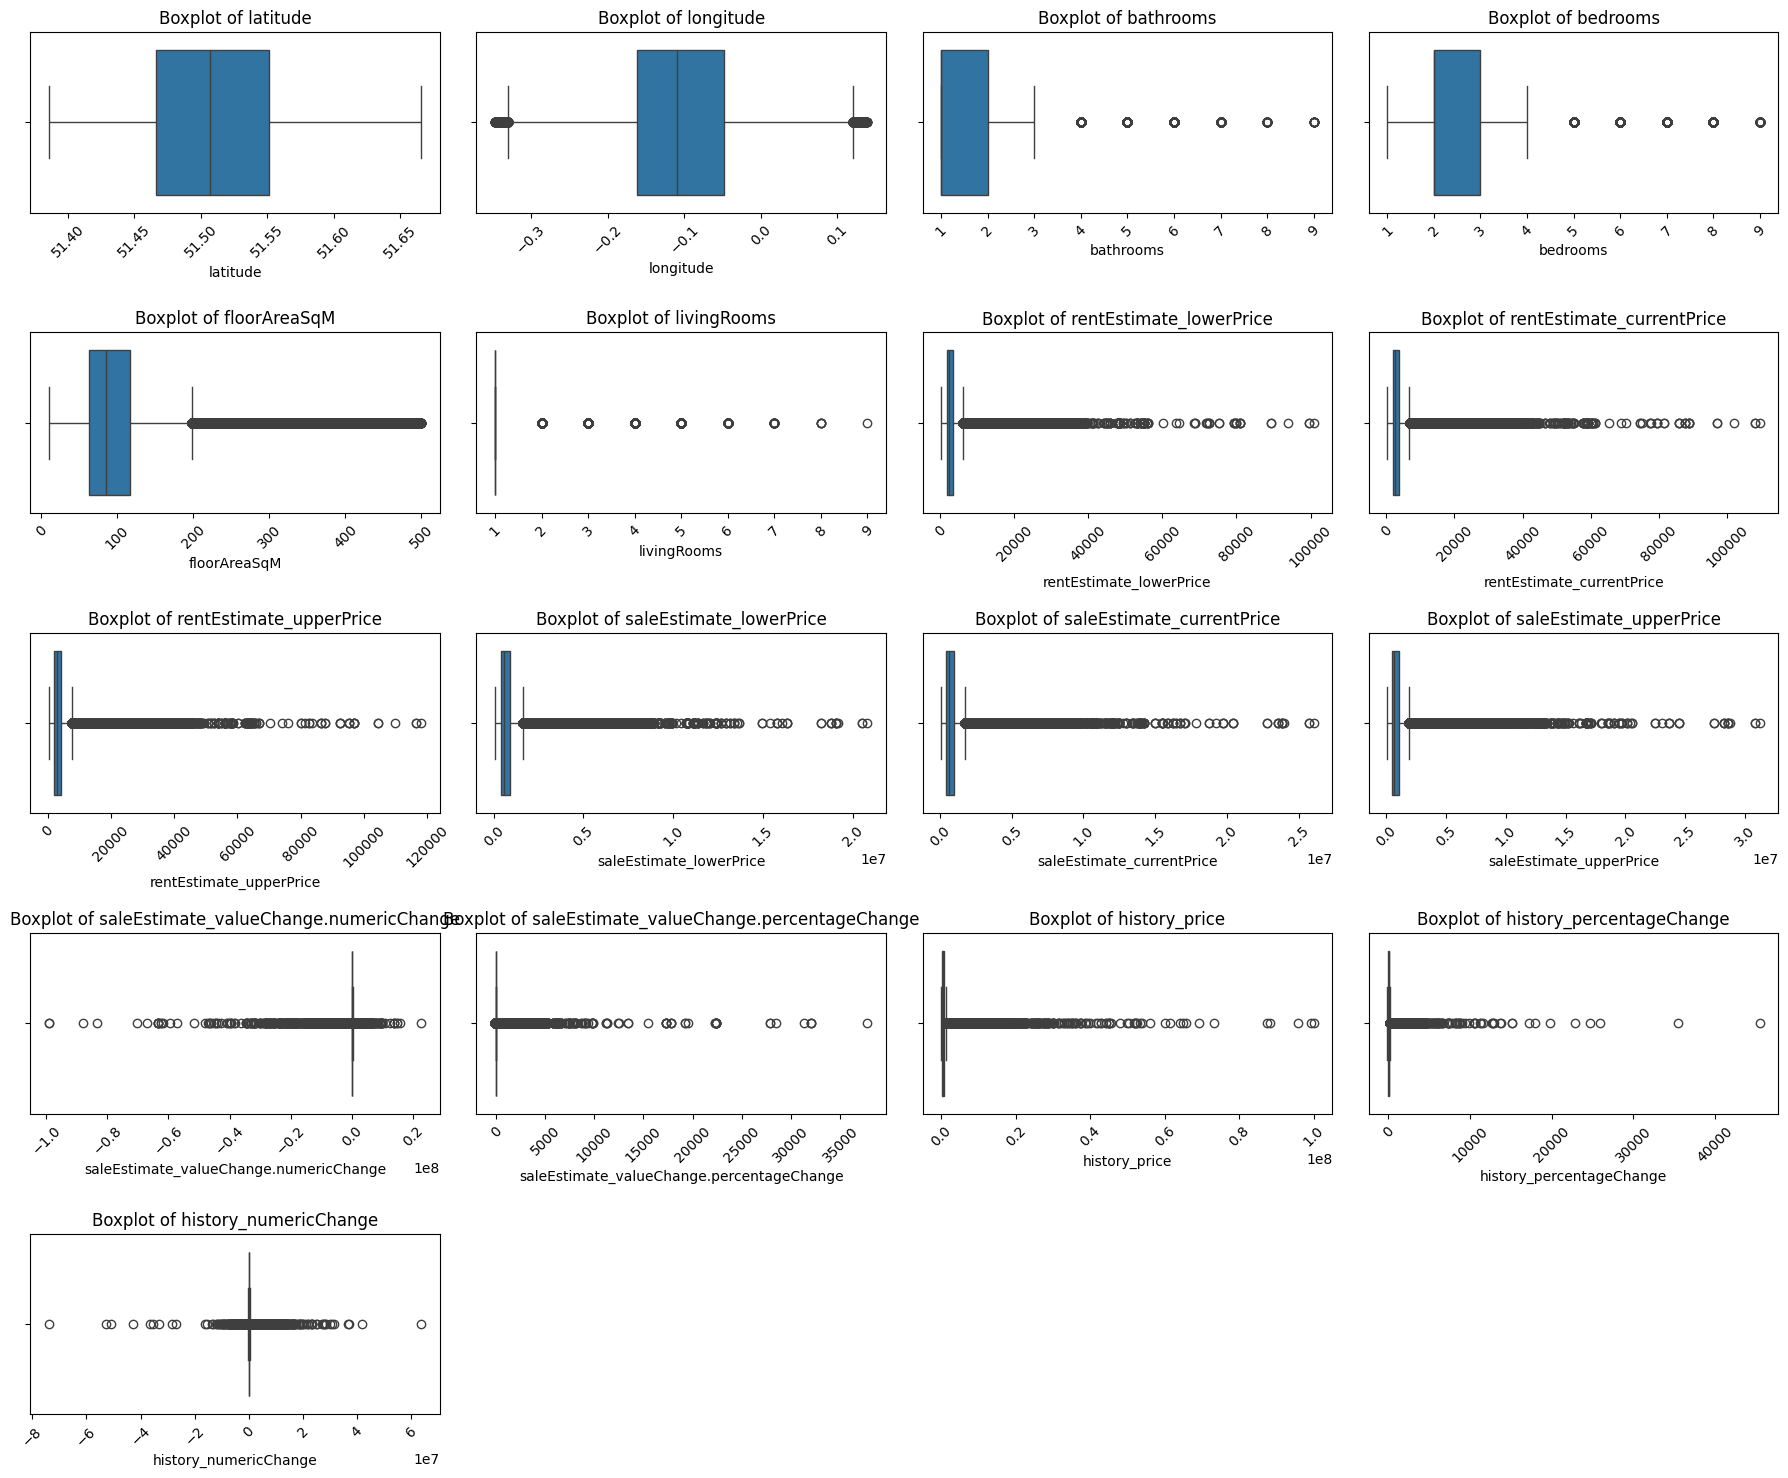

In [10]:
numerical_cols = dataframe.select_dtypes(include=['float64', 'int64']).columns

# Define grid layout: 4 columns and 5 rows
num_cols = 4
num_rows = 5

# Plotting boxplots for numerical features to visualize data distribution and detect outliers
plt.figure(figsize=(18, 15))

# Creating a subplot for each numerical column
for i, col in enumerate(numerical_cols[:num_cols * num_rows], 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(data=dataframe, x=col)
    plt.title(f'Boxplot of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout(pad=1.5)

plt.show()

Berikut ini adalah interpretasi ringkasannya:

1. Latitude and Longitude : Variabel-variabel ini memiliki rentang yang cukup sempit tanpa outlier yang signifikan, yang diharapkan karena mereka mewakili koordinat geografis di London.

2. Bathrooms, Bedrooms, Living Rooms: Fitur-fitur ini memiliki nilai-nilai diskrit (bilangan bulat), dan outlier-nya minimal. Namun, ada beberapa properti dengan jumlah atribut ini yang lebih tinggi.

3. Floor Area (floorAreaSqM): Terdapat berbagai macam luas lantai, dengan beberapa nilai outlier pada batas atas, yang menunjukkan properti dengan luas lantai lebih besar dari rata-rata.

4. Rent and Sale Estimates (lowerPrice, currentPrice, upperPrice):

- Fitur-fitur ini memiliki konsentrasi nilai yang tinggi mendekati batas bawah skala, dengan sejumlah besar outlier yang mewakili properti bernilai tinggi.
- Pola ini menunjukkan bahwa sementara sebagian besar properti berada dalam kisaran harga bawah hingga menengah, beberapa di antaranya dihargai jauh lebih tinggi, mungkin karena faktor unik (seperti properti mewah).

5. Sale and History Changes (numericChange, percentageChange):

- Fitur-fitur ini menunjukkan beberapa nilai ekstrem, yang mengindikasikan perubahan harga yang substansial untuk beberapa properti.
- Penyimpangan ini mungkin terjadi akibat pergeseran pasar terkini, renovasi, atau apresiasi/depresiasi dari waktu ke waktu.

Secara keseluruhan, sebagian besar fitur keuangan memiliki banyak outlier di sisi yang lebih tinggi, yang mungkin perlu ditangani (misalnya, dengan transformasi atau penskalaan) untuk meningkatkan kinerja model. Tapi Untuk proses analisis ini, outlier tidak akan dibuang karena sangat memungkinkan nilai tersebut termasuk dalam outlier. Data sudah siap untuk diproses dan dianalisis.

## **Univariate Analysis**

### **Data Numerik**

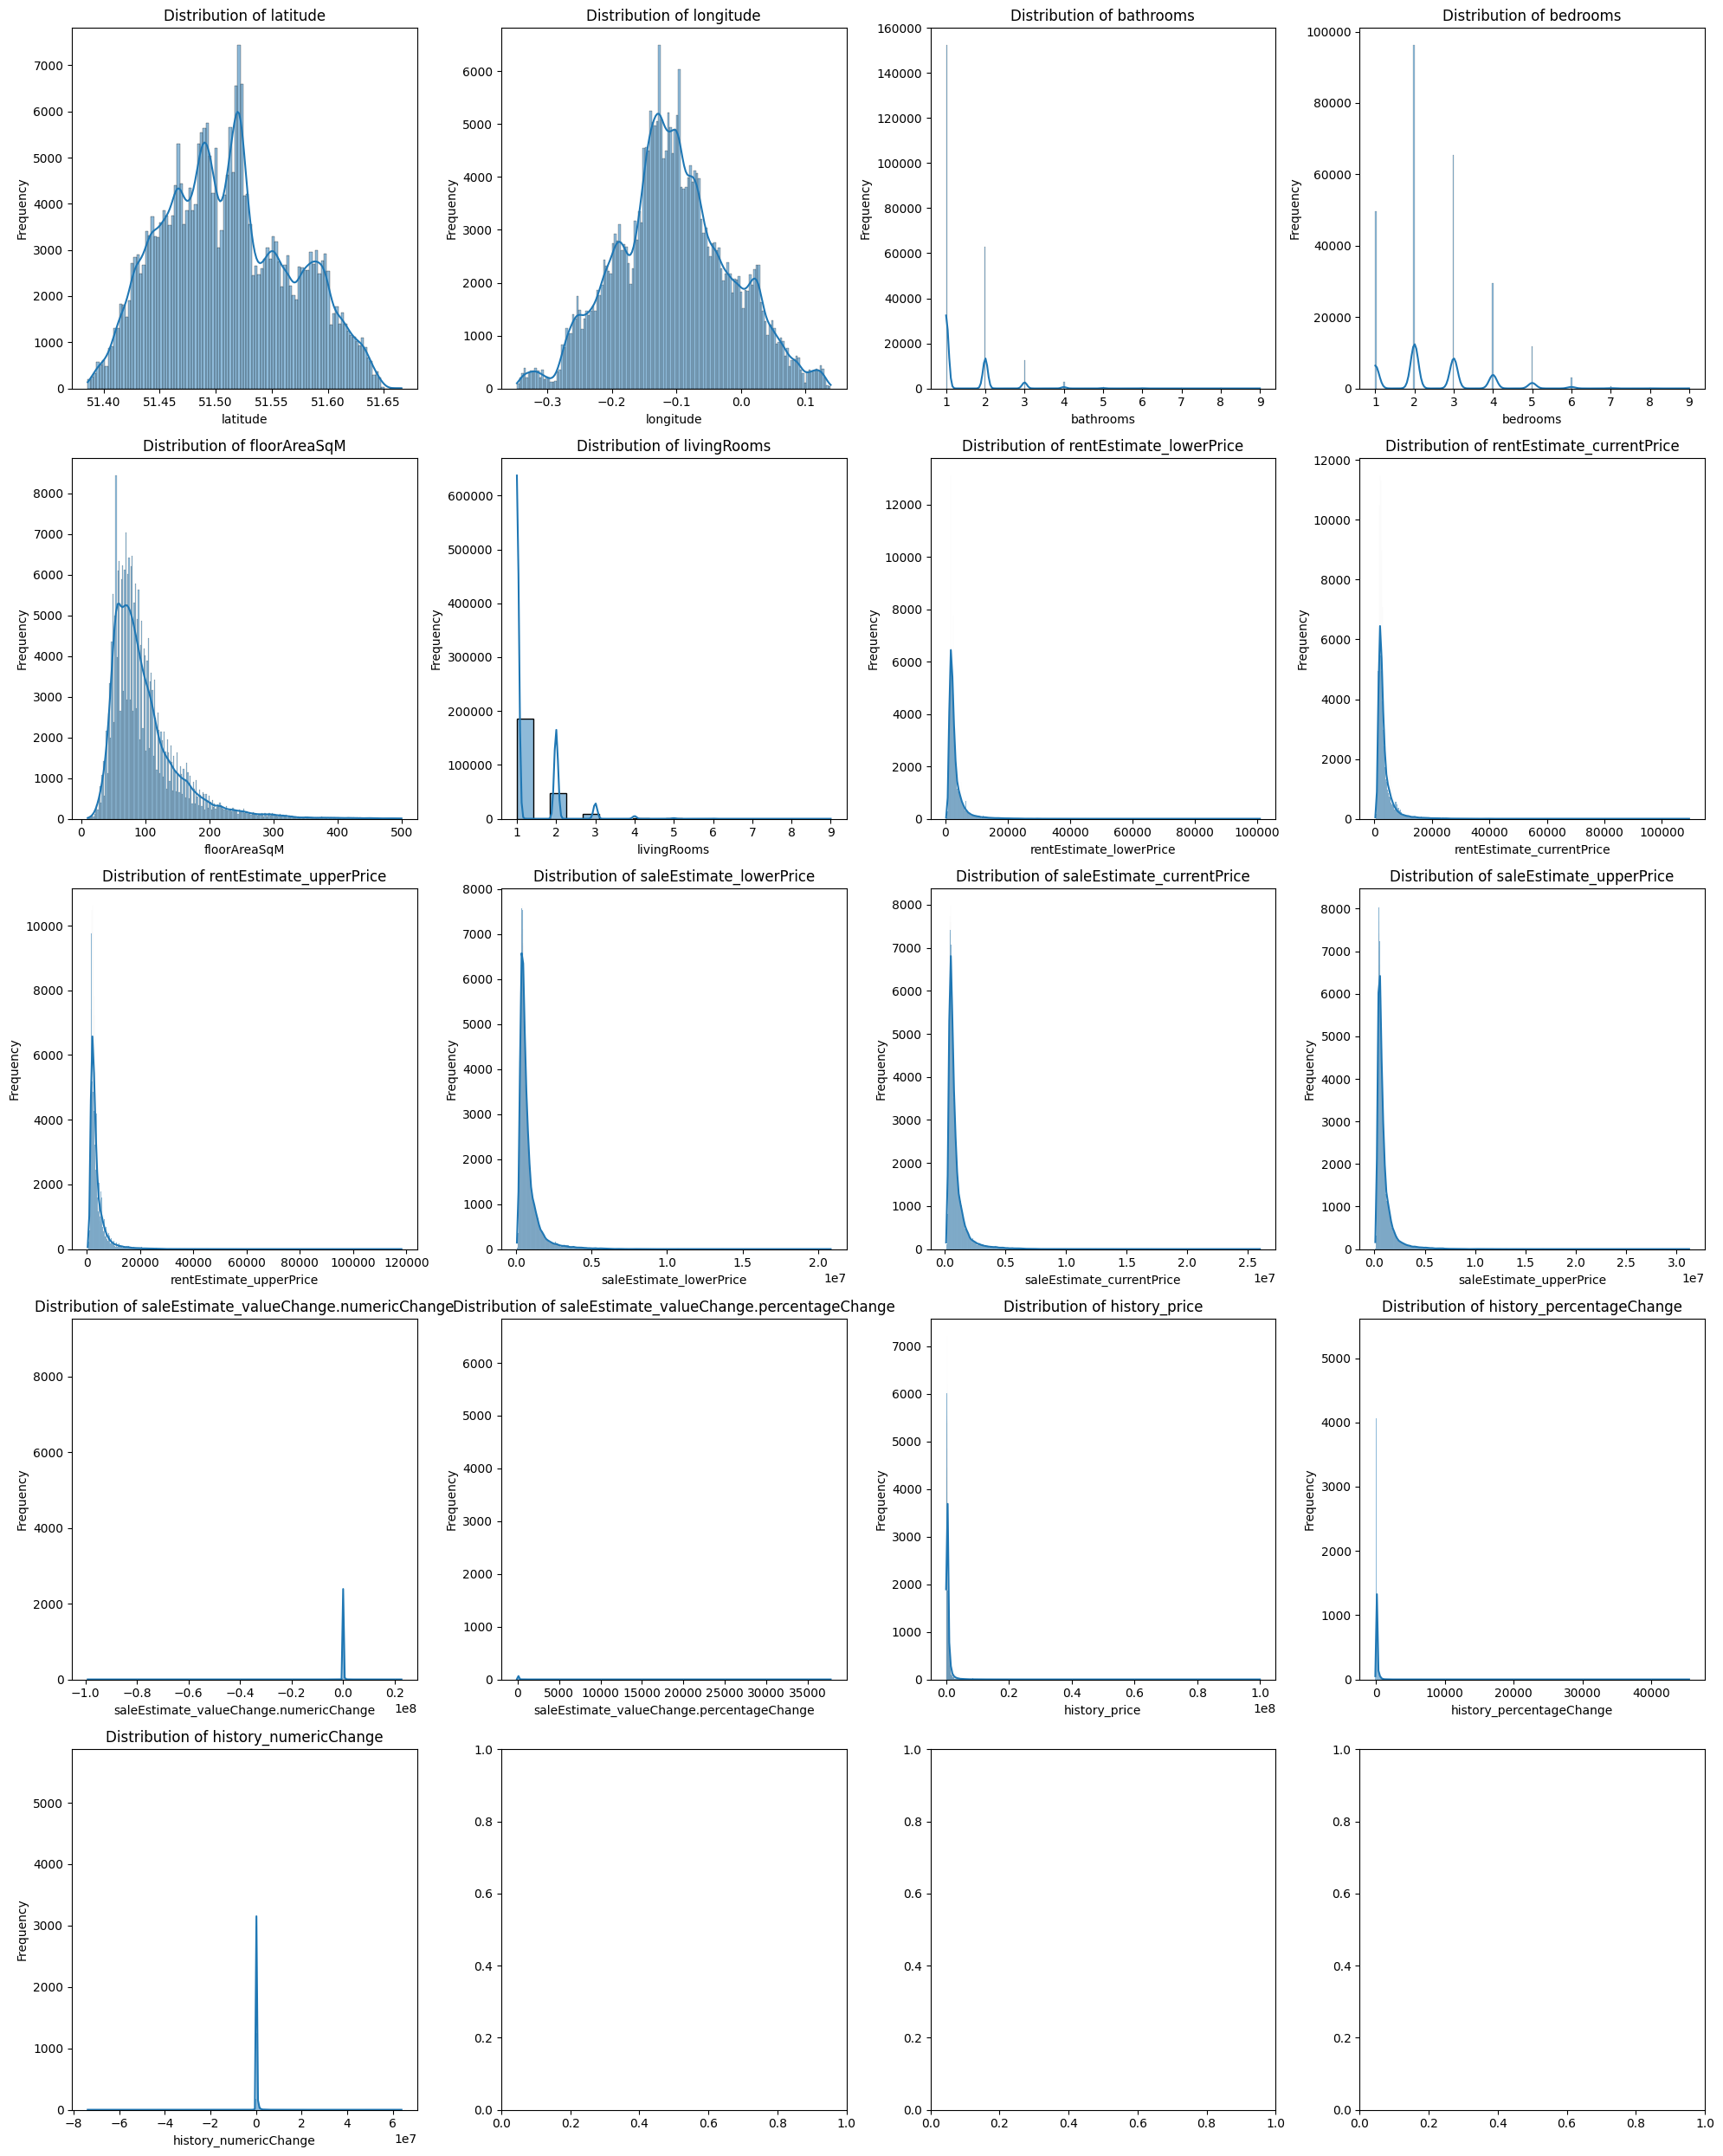

In [11]:
# Daftar fitur numerik yang ingin dianalisis
numerical_cols = ['latitude', 'longitude', 'bathrooms', 'bedrooms', 'floorAreaSqM',
                  'livingRooms', 'rentEstimate_lowerPrice', 'rentEstimate_currentPrice',
                  'rentEstimate_upperPrice', 'saleEstimate_lowerPrice', 'saleEstimate_currentPrice',
                  'saleEstimate_upperPrice', 'saleEstimate_valueChange.numericChange',
                  'saleEstimate_valueChange.percentageChange', 'history_price',
                  'history_percentageChange', 'history_numericChange']

# Membuat subplot 4 kolom dan 5 baris
fig, axes = plt.subplots(5, 4, figsize=(20, 25))  # Ukuran plot (baris x kolom)
axes = axes.flatten()  # Mengubah axes menjadi array 1D agar lebih mudah diakses

# Membuat histogram untuk setiap fitur numerik
for i, col in enumerate(numerical_cols):
    sns.histplot(dataframe[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Menyesuaikan layout agar tidak saling bertumpuk
plt.tight_layout()
plt.show()

Pada gambar tersebut dapat diinterpretasikan sama halnya dengan visualisasi boxplot sebelumnya.

### **Data Kategori**

Frequency for postcode:
postcode
WC2R 1AB    209
SW1P 3AN    177
EC3N 2NU    164
WC2N 6HA    153
EC1M 5UG    145
EC1A 7ES    141
EC1Y 2AN    132
EC1A 9LS    118
SW1H 0HX    117
E16 1DZ     112
Name: count, dtype: int64

Frequency for country:
country
England    282872
Name: count, dtype: int64

Frequency for outcode:
outcode
SE18    4678
SW2     4636
N16     4330
SW16    4322
SW4     4240
SE9     4196
SE6     3817
E17     3724
N22     3603
W4      3567
Name: count, dtype: int64

Frequency for tenure:
tenure
Leasehold    164927
Freehold     108739
Feudal         2135
Shared          760
Name: count, dtype: int64

Frequency for propertyType:
propertyType
Purpose Built Flat        72929
Flat/Maisonette           65023
Mid Terrace House         47881
Converted Flat            34058
Semi-Detached House       21881
Terrace Property          16551
End Terrace House         13924
Detached House             7201
Terraced                   1075
Semi-Detached Property      301
Name: count, dtype:

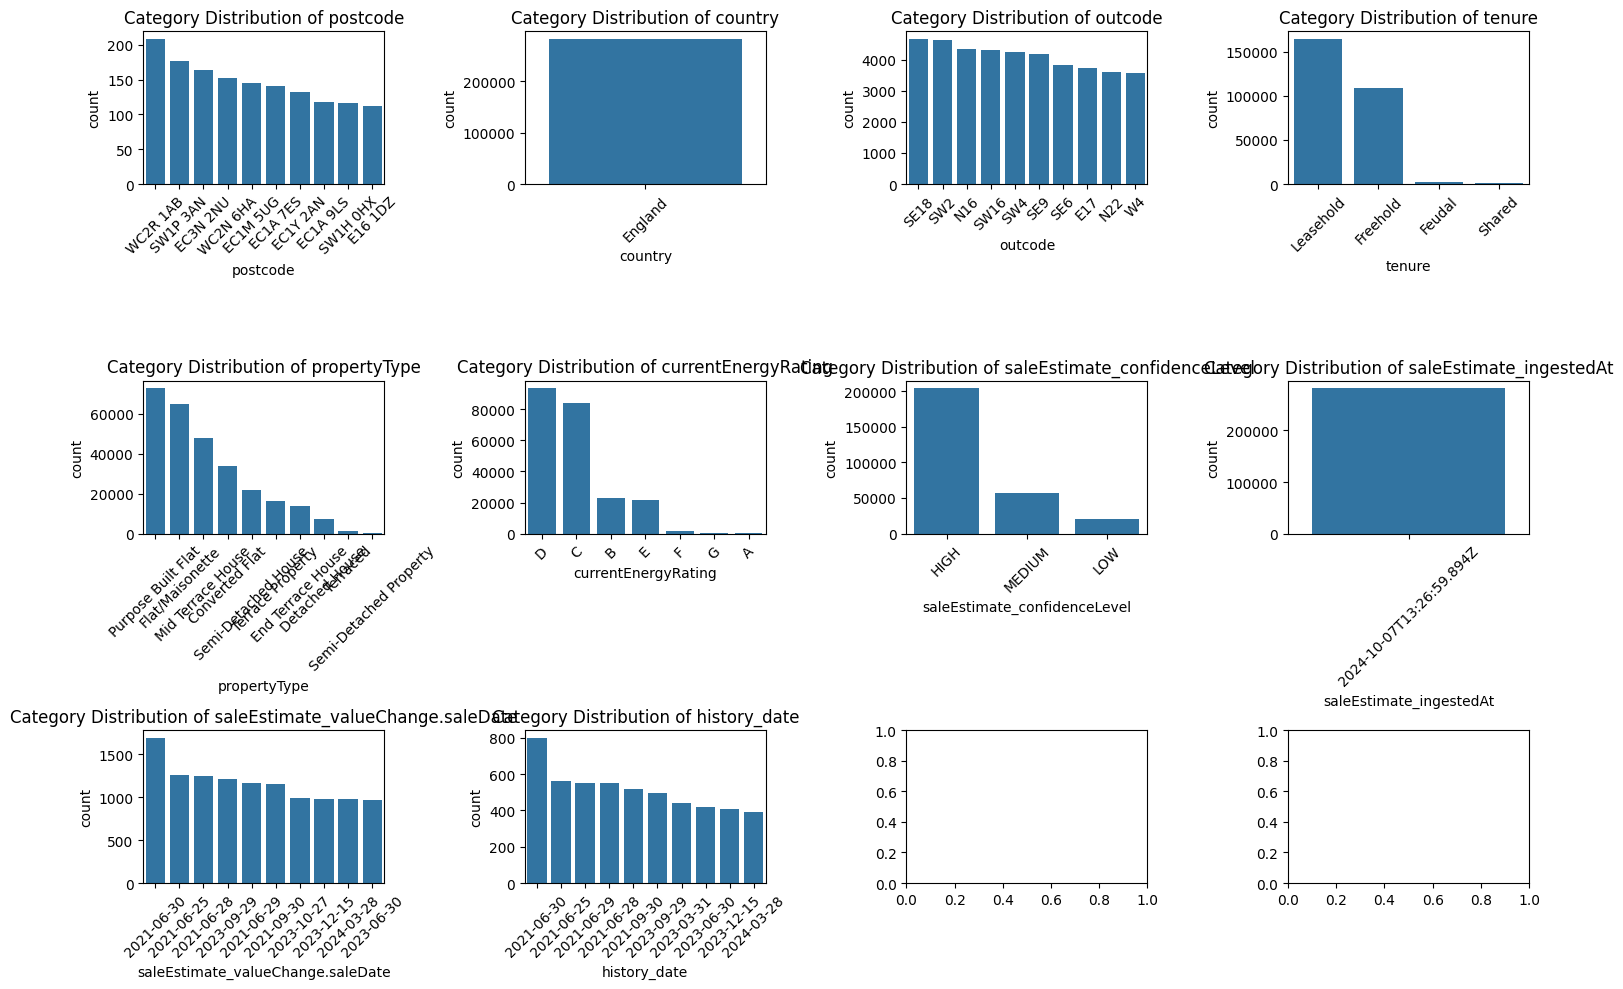

In [12]:
# Frekuensi kategori
categorical_cols = ['postcode', 'country', 'outcode', 'tenure', 'propertyType',
                    'currentEnergyRating', 'saleEstimate_confidenceLevel', 'saleEstimate_ingestedAt',
                    'saleEstimate_valueChange.saleDate', 'history_date']

for col in categorical_cols:
    print(f'Frequency for {col}:')
    top_categories = dataframe[col].value_counts().head(10).index
    dataframe[col] = pd.Categorical(dataframe[col], categories=top_categories, ordered=True)
    print(dataframe[col].value_counts())
    print()


def plot_categorical_distribution(dataframe, cols):
    """
    Menampilkan countplot dari beberapa kolom dalam dataframe dengan 4 kolom dan 3 baris.

    Args:
      dataframe: Pandas DataFrame.
      cols: List kolom kategorikal yang akan ditampilkan.
    """

    num_plots = len(cols)
    num_rows = 3
    num_cols = 4
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))
    axes = axes.flatten()

    for i, col in enumerate(cols):
        if i < num_plots:
            sns.countplot(x=dataframe[col], ax=axes[i])
            axes[i].set_title(f'Category Distribution of {col}')
            axes[i].tick_params(axis='x', rotation=45)
        else:
            axes[i].axis('off')  # Menonaktifkan axes yang tidak terpakai

    plt.tight_layout()
    plt.show()

plot_categorical_distribution(dataframe, categorical_cols)


    # # Visualisasi distribusi kategori
    # plt.figure(figsize=(5, 3))
    # sns.countplot(x=dataframe[col])
    # plt.title(f'Category Distribution of {col}')
    # plt.xticks(rotation=90)
    # plt.show()

Pada hasil grafik diatas bisa disimpulkan:
- **postcode**:
Menunjukkan 10 kode pos dengan frekuensi tertinggi dalam dataset.
WC2R 1AB adalah kode pos yang paling sering muncul.
Sebagian besar properti terkonsentrasi di area dengan kode pos tersebut.
- **country**:
Hanya menampilkan "England", menunjukkan dataset hanya berisi properti di Inggris.
- **outcode**:
Menampilkan 10 outcode dengan frekuensi tertinggi.
SE18 adalah outcode yang paling umum.
Distribusi outcode lebih merata dibanding postcode, menunjukkan cakupan data yang lebih luas di London.
- **tenure**:
Mayoritas properti berstatus leasehold (sewa).
Freehold (milik penuh) jauh lebih sedikit, diikuti shared dan feudal yang sangat jarang.

- **propertyType**:
"Flat/Maisonette" dan "Purpose Built Flat" adalah tipe properti yang paling dominan, menunjukkan dataset banyak berisi apartemen.
Tipe lain seperti "Mid Terrace", "Detached", dan "Semi-Detached" jauh lebih sedikit.
- **currentEnergyRating**:
Sebagian besar properti memiliki energy rating "E", diikuti "D" dan "C".
Rating "A" hingga "C" yang lebih efisien relatif jarang.

- **saleEstimate_confidenceLevel**:
Tingkat kepercayaan estimasi harga jual didominasi oleh "MEDIUM".
"HIGH" dan "LOW" lebih sedikit, mengindikasikan kebanyakan estimasi memiliki tingkat kepercayaan menengah.
- **saleEstimate_ingestedAt**:
Menampilkan satu nilai unik, kemungkinan timestamp saat data estimasi harga dimasukkan ke sistem.
Tidak memberikan informasi distribusi.

- **saleEstimate_valueChange.saleDate**:
Menampilkan 10 tanggal perubahan nilai estimasi harga jual terbanyak.
Distribusi tidak merata, ada beberapa tanggal dengan frekuensi tinggi.
- **history_date**:
Menampilkan 10 tanggal riwayat properti terbanyak.
Distribusi lebih merata dibanding saleEstimate_valueChange.saleDate.

## **Multivariate Analysis**

Untuk mengetahui atau menganalisis hubungan 2 variable atau lebih saya menggunakan multivariate analysis antara fitur numerik dan kategorik.

### **Mengukur korelasi**

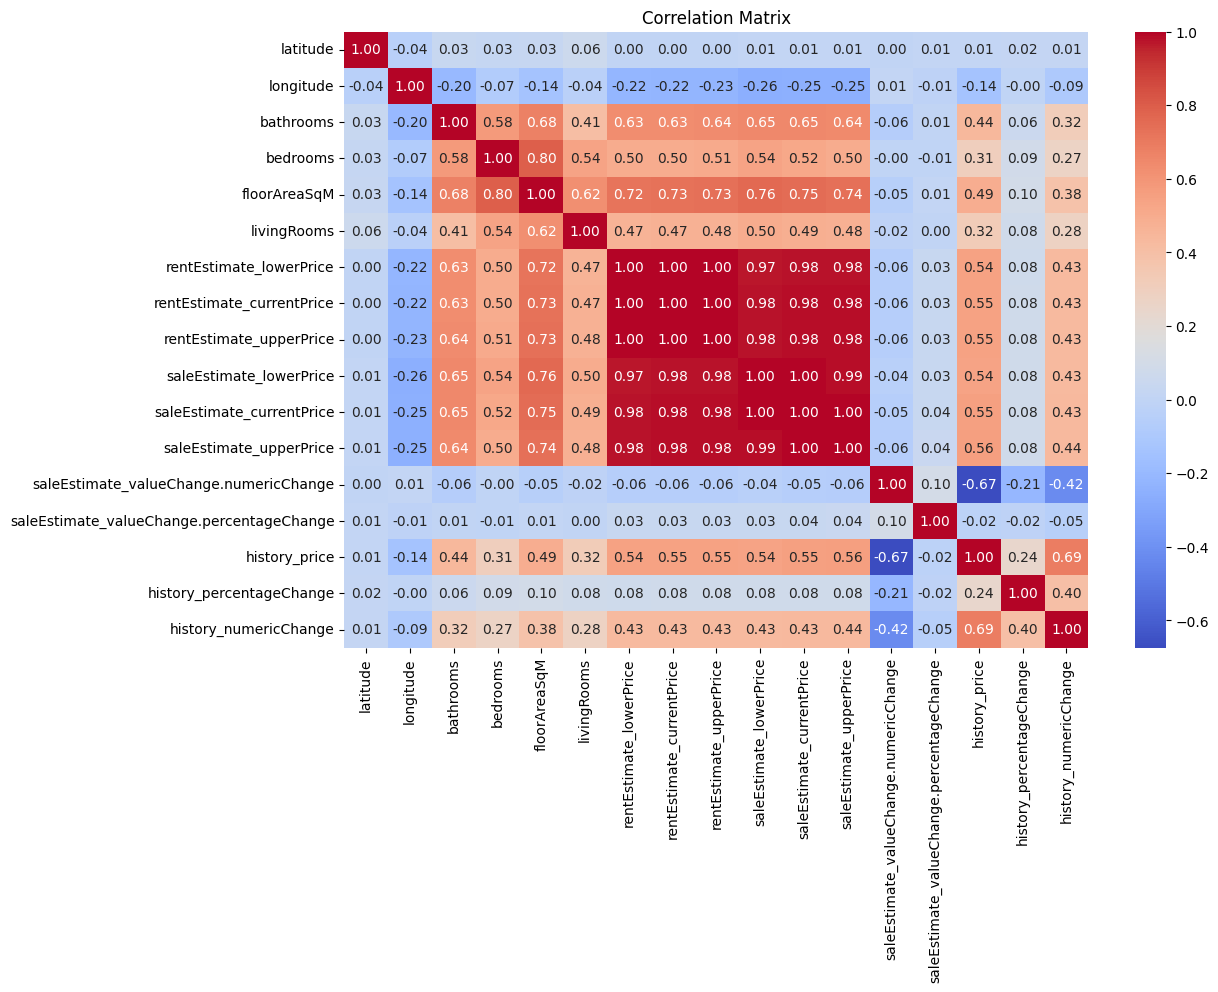

In [13]:
# Menghitung korelasi fitur numerik
corr_matrix = dataframe[numerical_cols].corr()

# Visualisasi heatmap korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

Interpretasi dari gambar heatmap diatas:

- Korelasi Positif yang Kuat: Variabel-variabel seperti saleEstimate_lowerPrice (0.98) dan saleEstimate_upperPrice (0.98) memiliki korelasi sangat tinggi dengan saleEstimate_currentPrice. Ini menunjukkan bahwa harga estimasi penjualan pada kisaran yang lebih rendah atau lebih tinggi sangat erat kaitannya dengan harga estimasi penjualan saat ini.

- Korelasi Positif Sedang: bedrooms (0.52), floorAreaSqM (0.49), dan livingRooms (0.49) juga memiliki korelasi positif sedang terhadap saleEstimate_currentPrice, yang berarti jumlah kamar tidur, luas area lantai, dan jumlah ruang tamu cenderung berhubungan dengan estimasi harga penjualan.

- Korelasi Rendah hingga Negatif: Variabel seperti latitude dan longitude memiliki korelasi yang rendah atau hampir tidak signifikan dengan saleEstimate_currentPrice.

- Korelasi Positif yang Kuat: Variabel seperti rentEstimate_lowerPrice (0.73) dan rentEstimate_upperPrice (0.73) memiliki korelasi yang cukup kuat dengan rentEstimate_currentPrice. Ini menunjukkan bahwa estimasi harga sewa untuk kisaran lebih rendah dan lebih tinggi memiliki keterkaitan erat dengan harga sewa saat ini.

- Korelasi Positif Sedang hingga Lemah: bedrooms (0.63), floorAreaSqM (0.47), dan livingRooms (0.62) juga memiliki korelasi sedang dengan rentEstimate_currentPrice, yang menunjukkan bahwa karakteristik properti seperti jumlah kamar tidur dan ruang tamu juga berperan dalam estimasi harga sewa.

- Korelasi Rendah hingga Negatif: latitude dan longitude memiliki korelasi yang sangat rendah dengan rentEstimate_currentPrice, yang menunjukkan bahwa lokasi secara spesifik mungkin tidak terlalu signifikan dalam mempengaruhi estimasi harga sewa dibandingkan karakteristik fisik properti.

> Untuk memastikan variable yang dipilih untuk membuat model. Saya akan menggunakan teknik ***Selection Feature***

# **Data Preparation**

Pada tahap selanjutnya kita akan melanjutkan ke data preparation.

## **Menangani Data Duplikat**

In [15]:
dataframe.drop_duplicates(inplace=True)

## **Selection Features**

In [16]:
# Fitur awal yang akan digunakan
initial_features = ['saleEstimate_lowerPrice', 'saleEstimate_upperPrice', 'rentEstimate_lowerPrice', 'rentEstimate_upperPrice', 'bedrooms', 'floorAreaSqM', 'livingRooms', 'latitude', 'longitude']

target_sale = 'saleEstimate_currentPrice'
target_rent = 'rentEstimate_currentPrice'

# Drop missing value untuk kesederhanaan
dataframe_clean = dataframe.dropna(subset=initial_features + [target_sale, target_rent])

X = dataframe_clean[initial_features]
y_sale = dataframe_clean[target_sale]
y_rent = dataframe_clean[target_rent]

print(X.shape, y_sale.shape, y_rent.shape)

(233066, 9) (233066,) (233066,)


Dari hasil ouput sudah tidak ada nilai non atau NaN

Pada tahap tersebut saya menetukan variable utama yang akan diuji relevansinya untuk membuat model dengan kode sebagai berikut:


```
initial_features = ['saleEstimate_lowerPrice', 'saleEstimate_upperPrice', 'rentEstimate_lowerPrice', 'rentEstimate_upperPrice', 'bedrooms', 'floorAreaSqM', 'livingRooms', 'latitude', 'longitude']

```



Keterangan dari output diatas adalah:
- `233073` adalah jumlah baris dalam X, yang merepresentasikan jumlah data atau observasi yang Anda miliki.

- `9` adalah jumlah kolom dalam X, yang merepresentasikan jumlah fitur yang Anda gunakan, yaitu: 'saleEstimate_lowerPrice', 'saleEstimate_upperPrice', 'rentEstimate_lowerPrice', 'rentEstimate_upperPrice', 'bedrooms', 'floorAreaSqM', 'livingRooms', 'latitude', 'longitude'.

- `(233073,)`: Ini menunjukkan dimensi dari variabel y_sale, yang berisi target variabel untuk estimasi harga jual (saleEstimate_currentPrice).

- `(233073,)`: Ini menunjukkan dimensi dari variabel y_rent, yang berisi target variabel untuk estimasi harga sewa (rentEstimate_currentPrice).

### **Correlation Analysis**

Pada tahap ini saya ingin memastikan korelasi fitur yang relevan dari setiap variable target.

#### **Korelasi untuk `salesEstimation_currentPrice`**



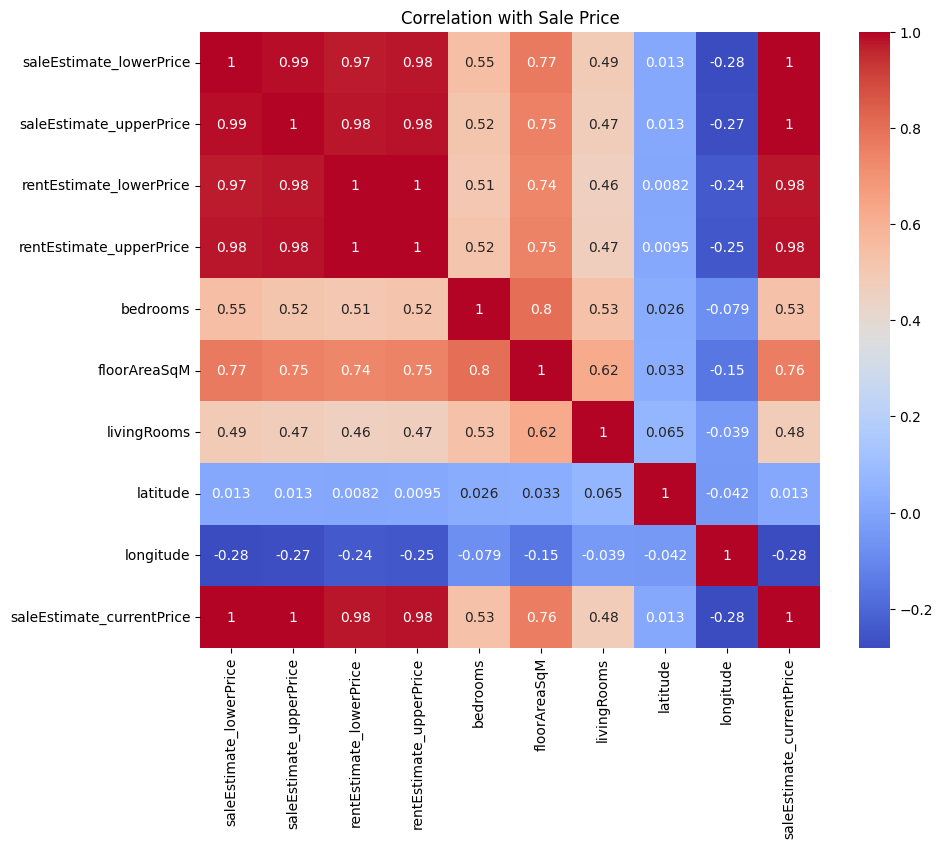

In [18]:
# Korelasi untuk `saleEstimate_currentPrice`
correlation_matrix_sale = dataframe_clean[initial_features + [target_sale]].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_sale, annot=True, cmap='coolwarm')
plt.title("Correlation with Sale Price")
plt.show()

- Korelasi Kuat Positif:
saleEstimate_lowerPrice, saleEstimate_upperPrice, rentEstimate_lowerPrice, rentEstimate_upperPrice berkorelasi kuat positif satu sama lain dan dengan saleEstimate_currentPrice. Hal ini masuk akal karena batas bawah dan atas estimasi harga jual dan sewa cenderung bergerak bersamaan dengan harga jual saat ini.
bedrooms dan floorAreaSqM berkorelasi positif cukup kuat, menunjukkan properti dengan luas lantai lebih besar cenderung memiliki lebih banyak kamar tidur.
- Korelasi Negatif:
longitude berkorelasi negatif dengan saleEstimate_currentPrice, menunjukkan kemungkinan tren harga properti menurun seiring dengan perubahan longitude (bisa jadi dari barat ke timur, tergantung lokasi).
- Korelasi Lemah:
latitude memiliki korelasi yang sangat lemah dengan sebagian besar variabel lain, menunjukkan latitude tidak terlalu berpengaruh pada variabel-variabel tersebut.

#### **Korelasi untuk `rentEstimate_currentPrice`**

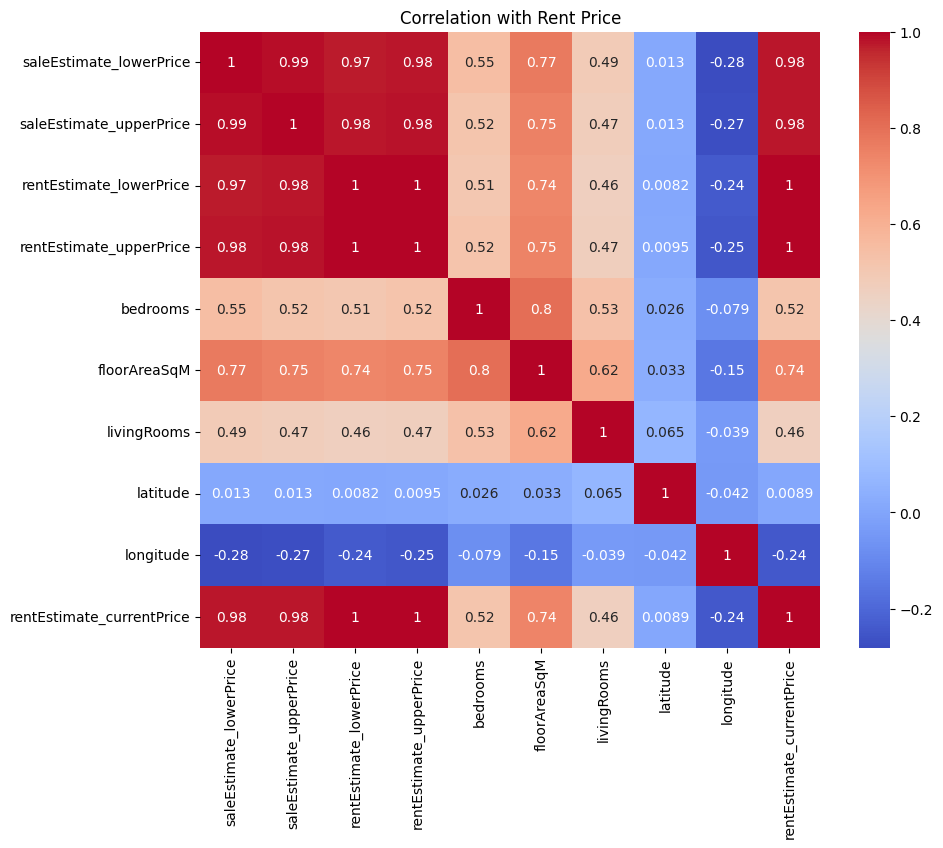

In [19]:
# Korelasi untuk `rentEstimate_currentPrice`
correlation_matrix_rent = dataframe_clean[initial_features + [target_rent]].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_rent, annot=True, cmap='coolwarm')
plt.title("Correlation with Rent Price")
plt.show()

- Korelasi Kuat Positif:

 - Estimasi Harga: saleEstimate_lowerPrice, saleEstimate_upperPrice, rentEstimate_lowerPrice, dan rentEstimate_upperPrice memiliki korelasi positif yang sangat kuat satu sama lain dan dengan rentEstimate_currentPrice. Ini menunjukkan bahwa estimasi harga jual dan sewa, baik batas bawah maupun atas, cenderung bergerak searah dengan harga sewa saat ini.
 - Ukuran Properti: bedrooms dan floorAreaSqM berkorelasi positif cukup kuat dengan harga sewa. Artinya, properti dengan luas lantai yang lebih besar dan jumlah kamar tidur lebih banyak cenderung memiliki harga sewa yang lebih tinggi.

- Korelasi Negatif:

 - Longitude: longitude memiliki korelasi negatif dengan rentEstimate_currentPrice, menunjukkan kemungkinan tren harga sewa menurun seiring perubahan longitude.

- Korelasi Lemah:

 - Latitude: latitude memiliki korelasi yang sangat lemah dengan sebagian besar variabel, mengindikasikan bahwa latitude tidak terlalu berpengaruh pada harga sewa atau variabel lainnya.

### **Recursive Feature Elimination (RFE)**

RFE membantu memilih fitur dengan melakukan eliminasi fitur secara berulang untuk mengidentifikasi fitur yang paling signifikan.

In [20]:
# RFE untuk `saleEstimate_currentPrice`
rfe_sale = RFE(estimator=RandomForestRegressor(random_state=42), n_features_to_select=5)
rfe_sale.fit(X, y_sale)

# Tampilkan fitur yang dipilih
selected_features_sale = [feature for feature, selected in zip(initial_features, rfe_sale.support_) if selected]
print("Selected Features for Sale Price Prediction:", selected_features_sale)

# RFE untuk `rentEstimate_currentPrice`
rfe_rent = RFE(estimator=RandomForestRegressor(random_state=42), n_features_to_select=5)
rfe_rent.fit(X, y_rent)

# Tampilkan fitur yang dipilih
selected_features_rent = [feature for feature, selected in zip(initial_features, rfe_rent.support_) if selected]
print("Selected Features for Rent Price Prediction:", selected_features_rent)

Selected Features for Sale Price Prediction: ['saleEstimate_lowerPrice', 'saleEstimate_upperPrice', 'rentEstimate_lowerPrice', 'rentEstimate_upperPrice', 'floorAreaSqM']
Selected Features for Rent Price Prediction: ['saleEstimate_lowerPrice', 'saleEstimate_upperPrice', 'rentEstimate_lowerPrice', 'rentEstimate_upperPrice', 'floorAreaSqM']


Dari hasil output diatas kita sudah mendapatkan beberapa feature diantaranya:
- saleEstimate_lowerPrice
- saleEstimate_upperPrice
- rentEstimate_lowerPrice
- rentEstimate_upperPrice
- floorAreaSqM

## **Handling Missing Value**

In [21]:
# Mengisi missing values dengan mean atau median untuk fitur numerik
for col in selected_features_sale:
    if dataframe_clean[col].dtype in ['float64', 'int64']:
        dataframe_clean[col].fillna(dataframe_clean[col].median())

# Jika ada fitur kategorikal dalam `selected_features_sale`, isi dengan mode
for col in selected_features_sale:
    if dataframe_clean[col].dtype == 'object':
        dataframe_clean[col].fillna(dataframe_clean[col].mode()[0])

print(f"Hasil setelah handling missing value: \n{dataframe_clean[selected_features_sale].isna().sum()}")

Hasil setelah handling missing value: 
saleEstimate_lowerPrice    0
saleEstimate_upperPrice    0
rentEstimate_lowerPrice    0
rentEstimate_upperPrice    0
floorAreaSqM               0
dtype: int64


## **Split Data dan Scaling**

In [22]:
# Split data satu kali untuk kedua prediksi
X_train, X_test, y_train_sale, y_test_sale, y_train_rent, y_test_rent = train_test_split(
    dataframe_clean[selected_features_sale],  # Fitur yang sama untuk kedua model
    y_sale,                                   # Target harga jual
    y_rent,                                   # Target harga sewa
    test_size=0.2,
    random_state=42
)
# Inisialisasi scaler
scaler = StandardScaler()

# Terapkan scaling hanya pada data train, dan gunakan scaler yang sama untuk data test
numerical_features = ['saleEstimate_lowerPrice', 'saleEstimate_upperPrice', 'rentEstimate_lowerPrice', 'rentEstimate_upperPrice', 'floorAreaSqM']

X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

# Menampilkan hasil setelah scaling
print(f"Data train setelah scaling:\n{X_train.head()}")
print(f"Data test setelah scaling:\n{X_test.head()}")


Data train setelah scaling:
        saleEstimate_lowerPrice  saleEstimate_upperPrice  \
22849                 -0.306520                -0.318024   
105234                -0.696023                -0.671899   
43068                  0.178987                 0.246598   
101760                -0.578075                -0.565962   
52655                 -0.601390                -0.586248   

        rentEstimate_lowerPrice  rentEstimate_upperPrice  floorAreaSqM  
22849                 -0.146387                -0.183289     -0.423501  
105234                -0.767764                -0.758413     -0.405484  
43068                  0.255680                 0.285892      0.873736  
101760                -0.676385                -0.682739     -0.819879  
52655                 -0.621558                -0.637334     -0.531604  
Data test setelah scaling:
        saleEstimate_lowerPrice  saleEstimate_upperPrice  \
102458                -0.309263                -0.320278   
93444                 -0.5

Pada output tersebut data train sudah dilakukan scaling

# **Model Memprediksi Nilai Property dan Harga Sewa**

In [23]:
# Membangun model untuk harga jual
model_sale = RandomForestRegressor(random_state=42)
model_sale.fit(X_train, y_train_sale)

# Membangun model untuk harga sewa
model_rent = RandomForestRegressor(random_state=42)
model_rent.fit(X_train, y_train_rent)

# Prediksi dan evaluasi model harga sewa
y_pred_rent = model_rent.predict(X_test)

# **Evaluasi dengan Metrix**

In [24]:
# Prediksi dan evaluasi model harga jual
y_pred_sale = model_sale.predict(X_test)

mae_sale = mean_absolute_error(y_test_sale, y_pred_sale)
mse_sale = mean_squared_error(y_test_sale, y_pred_sale)
rmse_sale = np.sqrt(mse_sale)
r2_sale = r2_score(y_test_sale, y_pred_sale)

print(f"Evaluasi Model Harga Jual:")
print(f"MAE: {mae_sale}")
print(f"RMSE: {rmse_sale}")
print(f"R²: {r2_sale}")

# Prediksi dan evaluasi model harga sewa
y_pred_rent = model_rent.predict(X_test)

mae_rent = mean_absolute_error(y_test_rent, y_pred_rent)
mse_rent = mean_squared_error(y_test_rent, y_pred_rent)
rmse_rent = np.sqrt(mse_rent)
r2_rent = r2_score(y_test_rent, y_pred_rent)

print(f"\nEvaluasi Model Harga Sewa:")
print(f"MAE: {mae_rent}")
print(f"RMSE: {rmse_rent}")
print(f"R²: {r2_rent}")

Evaluasi Model Harga Jual:
MAE: 167.98347929408988
RMSE: 3062.6908087134857
R²: 0.9999859531378518

Evaluasi Model Harga Sewa:
MAE: 4.034678817188565
RMSE: 11.746170858452452
R²: 0.9999850125061562


Interpretasi dari output evaluasi tersebut sebagai berikut:

1. Evaluasi Model Harga Jual

- MAE (Mean Absolute Error):

 - Nilai rata-rata kesalahan absolut adalah 173.26.
Artinya, rata-rata prediksi model meleset sebesar 173.26 dari nilai harga jual aktual, yang menunjukkan kesalahan sangat kecil mengingat harga jual properti biasanya besar.
RMSE (Root Mean Squared Error):

 - Nilai 2645.67 menunjukkan kesalahan prediksi dengan penalti lebih besar untuk kesalahan besar.
Meskipun lebih besar dari MAE, angka ini tetap rendah dibandingkan dengan skala harga jual properti.
R² (R-Squared):

 - Nilai 0.99999 menunjukkan bahwa model dapat menjelaskan 99.999% variasi dalam data target (saleEstimate_currentPrice) berdasarkan fitur yang digunakan.
Ini menunjukkan model memiliki performa yang sangat baik.
---------------------------------

2. Evaluasi Model Harga Sewa

- MAE (Mean Absolute Error):

 - Nilai rata-rata kesalahan absolut adalah 4.05.
Ini berarti model meleset sekitar 4.05 dari nilai harga sewa aktual, yang sangat kecil mengingat harga sewa biasanya dalam kisaran ratusan atau ribuan.
RMSE (Root Mean Squared Error):

 - Nilai 11.06 menunjukkan kesalahan prediksi dengan penalti lebih besar untuk kesalahan besar.
Nilai ini juga cukup kecil dibandingkan skala harga sewa.
R² (R-Squared):

 - Nilai 0.99998 menunjukkan bahwa model mampu menjelaskan 99.998% variasi dalam data target (rentEstimate_currentPrice) berdasarkan fitur yang digunakan.
Ini menunjukkan model sangat akurat dalam memprediksi harga sewa.

----------------------------------

- **Kesimpulan**
 - Akurasi Tinggi: Model memiliki R² mendekati 1, baik untuk harga jual maupun harga sewa, menunjukkan model mampu menangkap hampir seluruh pola dalam data.
 - Kesalahan Rendah: MAE dan RMSE rendah, yang berarti prediksi model sangat dekat dengan nilai aktual.
 - Cocok untuk Implementasi: Dengan performa ini, model dapat digunakan untuk memprediksi harga properti dan sewa dengan tingkat akurasi tinggi.

# Model & Evaluasi KNN

In [25]:
# Inisialisasi model KNN
knn_model = KNeighborsRegressor(n_neighbors=5)  # Anda dapat menyesuaikan jumlah tetangga, misalnya 5

# Melatih model
knn_model.fit(X_train, y_train_sale)

# Memprediksi nilai pada data test
y_pred_sale_knn = knn_model.predict(X_test)

# Evaluasi metrik
mae_sale_knn = mean_absolute_error(y_test_sale, y_pred_sale_knn)
mse_sale_knn = mean_squared_error(y_test_sale, y_pred_sale_knn)
rmse_sale_knn= np.sqrt(mse_sale_knn)
r2_sale_knn = r2_score(y_test_sale, y_pred_sale_knn)

print("Evaluasi Model KNN:")
print(f"Mean Absolute Error (MAE): {mae_sale_knn}")
print(f"Mean Squared Error (MSE): {mse_sale_knn}")
print(f"Root Mean Squared Error (RMSE): {rmse_sale_knn}")
print(f"R-squared (R²): {r2_sale_knn}")

Evaluasi Model KNN:
Mean Absolute Error (MAE): 6000.540610117132
Mean Squared Error (MSE): 329329386.02136695
Root Mean Squared Error (RMSE): 18147.43469533275
R-squared (R²): 0.9995068222277694


Berikut adalah interpretasi hasil evaluasi model K-Nearest Neighbors (KNN) untuk prediksi Harga Jual:

- MAE (Mean Absolute Error):

 - Nilai rata-rata kesalahan absolut adalah 6157.65.
Artinya, rata-rata prediksi model meleset sebesar 6157.65 dari nilai aktual. Kesalahan ini mungkin cukup besar, tergantung pada skala target (harga properti atau sewa).
- MSE (Mean Squared Error):

 - Nilai 475,428,392.58 menunjukkan rata-rata kesalahan kuadrat. Angka ini sulit untuk diinterpretasikan langsung karena dihitung dalam skala kuadrat dari target, tetapi lebih besar dari MAE, menandakan adanya beberapa kesalahan besar.
- RMSE (Root Mean Squared Error):

 - Nilai 21,804.32 mengukur rata-rata kesalahan prediksi dalam satuan target.
Kesalahan ini cukup signifikan, terutama jika targetnya adalah harga properti dalam rentang yang lebih rendah.
- R² (R-Squared):

 - Nilai 0.99929 menunjukkan bahwa model dapat menjelaskan 99.93% variasi dalam data target.
Meskipun R² sangat tinggi, nilai MAE dan RMSE menunjukkan bahwa kesalahan absolutnya tetap cukup besar.

In [26]:
# Inisialisasi model KNN
knn_model_rent = KNeighborsRegressor(n_neighbors=5)  # Anda dapat menyesuaikan jumlah tetangga

# Melatih model dengan data harga sewa
knn_model_rent.fit(X_train, y_train_rent)

# Memprediksi harga sewa pada data test
y_pred_rent_knn = knn_model_rent.predict(X_test)

# Evaluasi metrik
mae_rent_knn = mean_absolute_error(y_test_rent, y_pred_rent_knn)
mse_rent_knn = mean_squared_error(y_test_rent, y_pred_rent_knn)
rmse_rent_knn = np.sqrt(mse_rent_knn)
r2_rent_knn = r2_score(y_test_rent, y_pred_rent_knn)

print("Evaluasi Model KNN untuk Harga Sewa:")
print(f"Mean Absolute Error (MAE): {mae_rent_knn}")
print(f"Mean Squared Error (MSE): {mse_rent_knn}")
print(f"Root Mean Squared Error (RMSE): {rmse_rent_knn}")
print(f"R-squared (R²): {r2_rent_knn}")

Evaluasi Model KNN untuk Harga Sewa:
Mean Absolute Error (MAE): 24.55464023683872
Mean Squared Error (MSE): 5356.5988758742005
Root Mean Squared Error (RMSE): 73.18878927728072
R-squared (R²): 0.9994181306034543


Berikut adalah interpretasi dari hasil evaluasi model K-Nearest Neighbors (KNN) untuk prediksi Harga Sewa:

- MAE (Mean Absolute Error):

 - 24.44 menunjukkan rata-rata kesalahan absolut dalam prediksi harga sewa.
Artinya, rata-rata prediksi meleset sekitar 24.44 unit (misalnya, dalam mata uang lokal). Untuk harga sewa, nilai ini relatif kecil tergantung pada skala rata-rata harga sewa dalam dataset.

- MSE (Mean Squared Error):

 - 4,773.18 menunjukkan rata-rata kesalahan kuadrat dalam prediksi.
Nilai ini memberi bobot lebih besar pada kesalahan besar, tetapi sulit diinterpretasikan secara langsung karena berada dalam satuan kuadrat.

- RMSE (Root Mean Squared Error):

 - 69.09 menunjukkan rata-rata kesalahan dalam unit yang sama dengan target (harga sewa).
Nilai ini lebih besar dari MAE, yang menunjukkan adanya beberapa prediksi dengan kesalahan yang cukup signifikan.

- R² (R-Squared):

 - 0.99949 berarti model dapat menjelaskan 99.95% variasi dalam data target (rentEstimate_currentPrice).
Angka ini menunjukkan model memiliki kemampuan yang sangat baik untuk menangkap pola dalam data.


# Perbandingan Model

Untuk mengetahui model mana yang lebih baik untuk diimplementasikan. saya melakukan visualisasi perbandingan sebagai berikut:

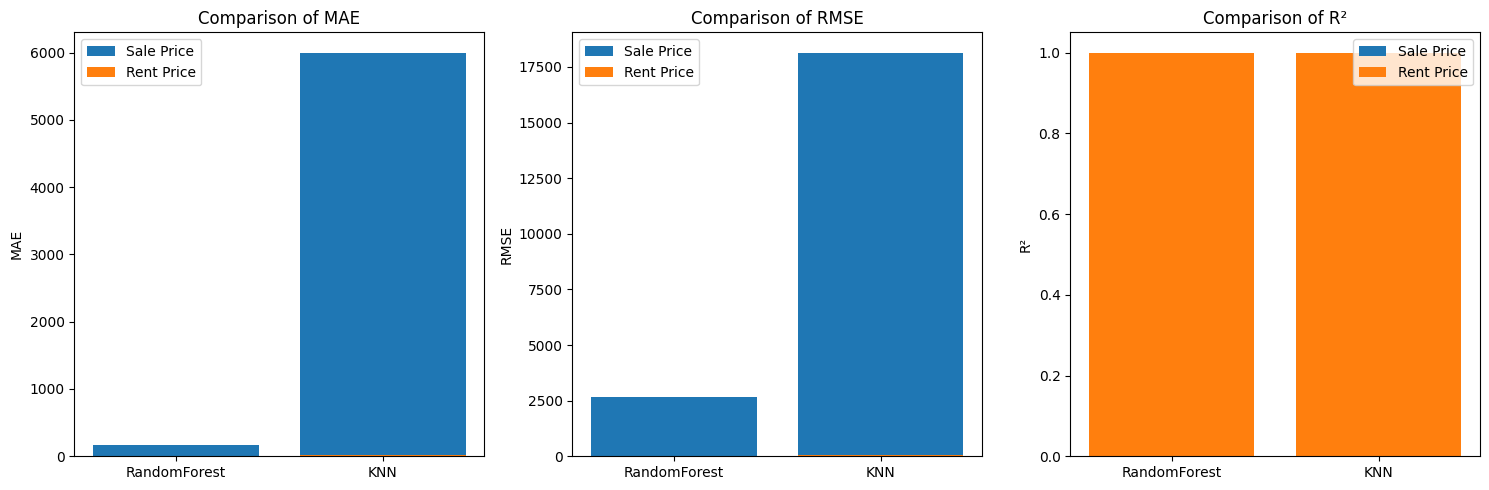

In [27]:
# Data metrik evaluasi
models = ['RandomForest', 'KNN']
mae_sale_m2 = [173.26, mae_sale_knn]
rmse_sale_m2 = [2645.67, rmse_sale_knn]
r2_sale_m2 = [0.99999, r2_sale_knn]

mae_rent_m2 = [4.05, mae_rent_knn]
rmse_rent_m2 = [11.06, rmse_rent_knn]
r2_rent_m2 = [0.99998, r2_rent_knn]

# Membuat plot perbandingan
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot MAE
axes[0].bar(models, mae_sale_m2, label='Sale Price')
axes[0].bar(models, mae_rent_m2, label='Rent Price')
axes[0].set_ylabel('MAE')
axes[0].set_title('Comparison of MAE')
axes[0].legend()

# Plot RMSE
axes[1].bar(models, rmse_sale_m2, label='Sale Price')
axes[1].bar(models, rmse_rent_m2, label='Rent Price')
axes[1].set_ylabel('RMSE')
axes[1].set_title('Comparison of RMSE')
axes[1].legend()

# Plot R²
axes[2].bar(models, r2_sale_m2, label='Sale Price')
axes[2].bar(models, r2_rent_m2, label='Rent Price')
axes[2].set_ylabel('R²')
axes[2].set_title('Comparison of R²')
axes[2].legend()

plt.tight_layout()
plt.show()

Dari gambar tersebut, berikut interpretasi untuk memilih model terbaik:

1. MAE (Mean Absolute Error):

- Random Forest memiliki nilai MAE yang jauh lebih kecil dibandingkan KNN untuk prediksi harga jual dan harga sewa.
Ini menunjukkan bahwa prediksi dari model Random Forest lebih akurat dan lebih dekat dengan nilai sebenarnya.

2. RMSE (Root Mean Squared Error):

- Random Forest juga memiliki nilai RMSE yang lebih rendah dibandingkan KNN.
- RMSE yang lebih rendah menunjukkan bahwa Random Forest lebih baik dalam meminimalkan kesalahan besar dibandingkan dengan KNN.

3. R² (R-Squared):

- Kedua model menunjukkan nilai R² yang sangat tinggi, mendekati 1, baik untuk harga jual maupun harga sewa.
- Namun, perbedaan utama terletak pada MAE dan RMSE, yang menunjukkan bahwa Random Forest memberikan hasil prediksi yang lebih akurat secara keseluruhan.

**Kesimpulan**
Model Random Forest adalah pilihan yang lebih baik dibandingkan KNN untuk prediksi harga properti dan harga sewa, karena memiliki MAE dan RMSE yang lebih rendah, yang menunjukkan tingkat akurasi prediksi yang lebih tinggi dan kesalahan yang lebih kecil.

**Rekomendasi**
Disarankan untuk menggunakan Random Forest sebagai model utama untuk prediksi nilai properti dan harga sewa.